In [1]:
from pylab import np
import matplotlib.pyplot as plt

In [12]:
N = 2000 # number of steps
tau = 20.0 # time range [s]
dt = tau / float(N-1) # time step [s]

t = np.linspace(0, tau, N) # N 1D array evenly spaced t_i time array
theta = np.zeros([N,2]) # Nx2 2D array for theta_i, omega_i state

In [3]:
def euler(y, t, dt, derivs): # Euler method y_i -> y_i+1
    y_next = y + derivs(y,t) * dt
    return y_next

def rk2(y, t, dt, derivs): # rk2 method y_i -> y_i+1
    k1 = dt * derivs(y, t)
    k2 = dt * derivs(y + k1, t + dt)
    y_next = y + (k1 + k2) / 2.
    return y_next
def rk4(y, t, dt, derivs): # rk4 method y_i -> y_i+1
    k1 = dt * derivs(y, t)
    k2 = dt * derivs(y + k1 / 2., t + dt / 2.)
    k3 = dt * derivs(y + k2 / 2., t + dt / 2.)
    k4 = dt * derivs(y + k3, t + dt)
    y_next = y + (k1 + 2.*k2 + 2.*k3 + k4) / 6.
    return y_next

def pendulum( y, t):
    diff0 = y[1] # dtheta/dt = omega
    diff1 = -(g/L)*np.sin(y[0])
    diff1 -= 2.*beta*y[1] # domega/dt = −(g/L)*sin(theta)
    diff1 += gamma*(g/L)*np.cos(omega_F*t)/m
    return np.array([diff0, diff1])

In [13]:
g = 9.8 # grav. acceleration [m/s^2]

L = 9.8 # pendulum length [m]
m = 1.0 # pendulum mass [kg]
beta = 0.0 # damping constant [s^-1]
gamma = 0.0 # driving force size [N]
omega_F = 0.666 # driving force freq. [s^-1]

natfrq =  np.sqrt(g/L)
print("natural freq. = ", natfrq, "[rad/s]")

natural freq. =  1.0 [rad/s]


In [22]:
theta_o = 0.1 # initial theta [radians]
omega_o = 0.0 # inital omega [rad/s]

theta[0,0] = theta_o
theta[0,1] = omega_o

theta_shm = np.zeros([N,2])
for j in range(N): # Loop over steps
    theta_shm[j,0] = theta_o * np.cos( natfrq*t[j] )  + ( omega_o / natfrq ) * np.sin( natfrq*t[j] )
    theta_shm[j,1] = - theta_o * natfrq * np.sin( natfrq*t[j] )  + omega_o * np.cos( natfrq*t[j] )

In [23]:
for j in range(N-1): # Loop over steps
    theta[j+1] = rk4(theta[j], t[j], dt, pendulum)

thetan = theta[:,0].copy()
omegan = theta[:,1].copy()

Text(0.5, 0.98, 'theta, omega versus time')

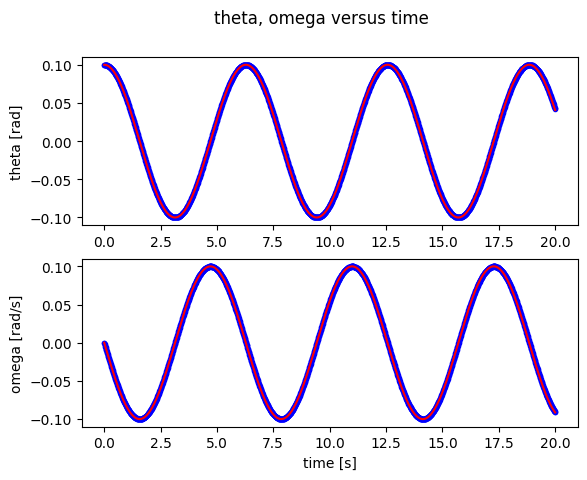

In [24]:
fig, axes = plt.subplots(2)
axes[0].plot(t, thetan, "b.")
axes[0].plot(t, theta_shm[:,0], "r-")
axes[1].plot(t, omegan, "b.")
axes[1].plot(t, theta_shm[:,1], "r-")

axes[1].set_xlabel ('time [s]')
axes[0].set_ylabel ('theta [rad]')
axes[1].set_ylabel ('omega [rad/s]')
fig.suptitle('theta, omega versus time')

Text(0, 0.5, 'angle [rad], ang. vel [rad/s]')

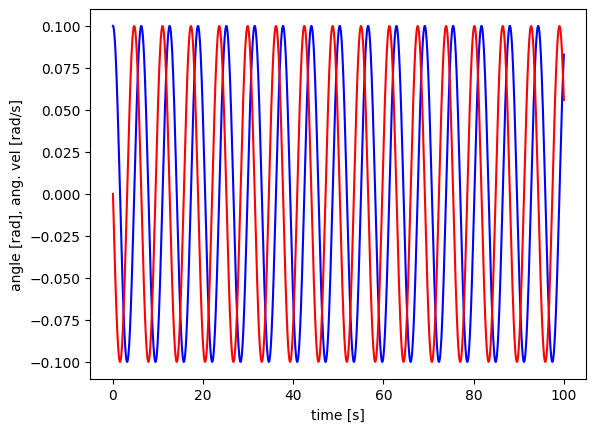

In [21]:
thetan = ( thetan + np.pi ) % ( 2*np.pi ) - np.pi
thetanss = thetan[1000:]
omeganss = omegan[1000:]
plt.plot(t, thetan, "b-")
plt.plot(t, omegan, "r-")
plt.xlabel ('time [s]')
plt.ylabel ('angle [rad], ang. vel [rad/s]')

Text(0, 0.5, 'omega [rad/s]')

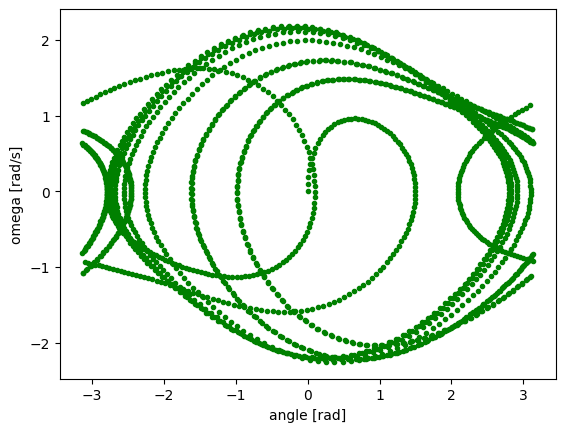

In [10]:
plt.plot(thetan, omegan, "g.")
plt.xlabel ('angle [rad]')
plt.ylabel ('omega [rad/s]')

Text(0, 0.5, 'omega [rad/s]')

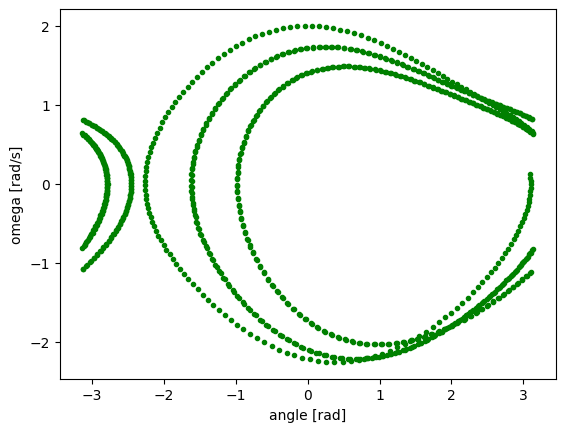

In [11]:
plt.plot(thetanss, omeganss, "g.")
plt.xlabel ('angle [rad]')
plt.ylabel ('omega [rad/s]')